<a href="https://colab.research.google.com/github/MostafijurNaeem/PP-02-25-Project-/blob/main/PP_02_25(Weather_Data_Analysis_Tool).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: "Weather Data Analysis Tool"

---

 Objective:

 Develop a Python application that analyzes and visualizes weather data, providing insights such
 as temperature trends, rainfall patterns, and extreme weather events using file handling and
 Python core concepts.

---



PP-02-25(MD. MOSTAFIJU RAHMAN NAEEM)

 Registration No: 2020136025

 Department of Oceanography

 Shahjalal University of Science and Technology, Sylhet.

**Import the Libaries**

In [122]:
import csv
import random
from datetime import datetime, timedelta
import os
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd

Step 1: Data Initialization

---

Generating Random weather data and saving in a csv file.


In [104]:
# Function to generate random weather data and save it to a CSV file
def generate_weather_data(file_name):
    conditions = ["Sunny", "Rainy", "Cloudy", "Stormy", "Windy"]
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 12, 31)
    delta = end_date - start_date  # Calculate the number of days

    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Date", "Temperature (°C)", "Rainfall (mm)", "Humidity (%)", "Wind Speed (km/h)", "Condition"])

        for i in range(delta.days + 1):  # Iterate through each day of the year
            date = start_date + timedelta(days=i)
            temperature = round(random.uniform(-10, 40), 1)
            rainfall = round(random.uniform(0, 200), 1)
            humidity = random.randint(10, 100)
            wind_speed = random.randint(0, 50)
            condition = random.choice(conditions)

            writer.writerow([date.strftime('%Y-%m-%d'), temperature, rainfall, humidity, wind_speed, condition])

# Call the function to generate data for the entire year of 2023
generate_weather_data("weather_data_2023.csv")

Step 2: Importing and Validating Data
**bold text**

In [105]:
# Function to load and validate weather data
def load_weather_data_2023(file_name):
    weather_data_2023 = []
    with open(file_name, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            try:
                date = datetime.strptime(row['Date'], '%Y-%m-%d')
                temperature = float(row['Temperature (°C)'])
                rainfall = float(row['Rainfall (mm)'])
                humidity = float(row['Humidity (%)'])
                wind_speed = float(row['Wind Speed (km/h)'])
                condition = row['Condition']
                weather_data_2023.append({
                    'Date': date,
                    'Temperature': temperature,
                    'Rainfall': rainfall,
                    'Humidity': humidity,
                    'Wind Speed': wind_speed,
                    'Condition': condition
                })
            except ValueError:
                print(f"Invalid data in row: {row}")
    return weather_data_2023

**Step 3: Analyzing Weather Trends**

In [118]:
# Function to calculate statistics for weather data
def calculate_statistics(weather_data_2023):
    total_temp = sum([data['Temperature'] for data in weather_data_2023])
    total_rainfall = sum([data['Rainfall'] for data in weather_data_2023])
    total_humidity = sum([data['Humidity'] for data in weather_data_2023])

    avg_temp = total_temp / len(weather_data_2023)
    avg_rainfall = total_rainfall / len(weather_data_2023)
    avg_humidity = total_humidity / len(weather_data_2023)

    return avg_temp, avg_rainfall, avg_humidity

**Step 4: Weather Reports**

In [107]:
# Function to generate a weather report
def generate_report(weather_data_2023, start_date, end_date):
    filtered_data = [data for data in weather_data_2023 if start_date <= data['Date'] <= end_date]
    avg_temp, avg_rainfall, avg_humidity = calculate_statistics(filtered_data)

    print(f"\nWeather Report from {start_date} to {end_date}")
    print(f"Average Temperature: {avg_temp}°C")
    print(f"Average Rainfall: {avg_rainfall} mm")
    print(f"Average Humidity: {avg_humidity}%")


**Step 5: Data Visualization**

In [108]:
#Function to plot temperature trends using Matplotlib (Line Chart)
def plot_temperature_trends(weather_data_2023):
    dates = [data['Date'] for data in weather_data_2023]
    temperatures = [data['Temperature'] for data in weather_data_2023]

    plt.figure(figsize=(10,6))
    plt.plot(dates, temperatures, label="Temperature (°C)", color='blue')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Function to plot daily rainfall trends in a specific month (Bar Chart)
def plot_rainfall_trends(weather_data_2023, month):
    # Filter data for the selected month
    monthly_data = [data for data in weather_data_2023 if data['Date'].month == month]
    dates = [data['Date'].strftime('%Y-%m-%d') for data in monthly_data]
    rainfall = [data['Rainfall'] for data in monthly_data]

    plt.figure(figsize=(10,6))
    plt.bar(dates, rainfall, color='green')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.title(f'Daily Rainfall in Month {month}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to generate summary table showing weather stats by month
def summary_by_month(weather_data_2023):
    # Convert weather data to a pandas DataFrame for easier processing
    df = pd.DataFrame(weather_data_2023)
    df['Month'] = df['Date'].dt.to_period('M')  # Extract month and year as period

    # Group by Month and calculate statistics
    summary = df.groupby('Month').agg(
        avg_temp=('Temperature', 'mean'),
        avg_rainfall=('Rainfall', 'mean'),
        avg_humidity=('Humidity', 'mean')
    ).reset_index()

    print("\nWeather Stats by Month (Summary Table):")
    print(summary)

**Step 6: Advanced Features**

In [109]:
# Function to export weather data to a CSV file
def export_to_csv(weather_data_2023, file_name):
    with open(file_name, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=weather_data_2023[0].keys())
        writer.writeheader()
        for data in weather_data_2023:
            writer.writerow(data)

    # Provide an option to download the file
    files.download(file_name)


**Step 7: User Interface**

In [110]:
# Main menu function for interactive user interface
def menu():
    print("\nWeather Data Analysis Tool")
    print("1. Import weather data")
    print("2. View statistics for a date range")
    print("3. Generate weather report")
    print("4. Visualize temperature trends")
    print("5. Visualize rainfall trends")
    print("6. Summary weather stats by month")
    print("7. Export report")
    print("8. Exit")

    choice = input("Choose an option: ")
    return choice

**Step 8: Main Function**

File 'weather_data_2023.csv' already exists. Skipping data generation.

Weather Data Analysis Tool
1. Import weather data
2. View statistics for a date range
3. Generate weather report
4. Visualize temperature trends
5. Visualize rainfall trends
6. Summary weather stats by month
7. Export report
8. Exit
Choose an option: 5
Enter the month (1-12) to visualize rainfall: 5


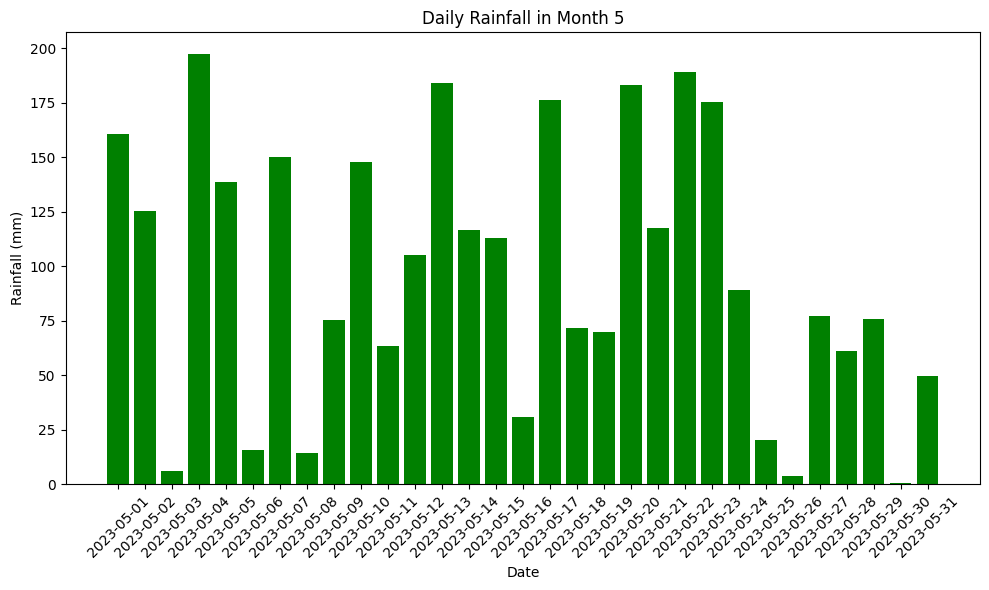


Weather Data Analysis Tool
1. Import weather data
2. View statistics for a date range
3. Generate weather report
4. Visualize temperature trends
5. Visualize rainfall trends
6. Summary weather stats by month
7. Export report
8. Exit
Choose an option: 6

Weather Stats by Month (Summary Table):
      Month   avg_temp  avg_rainfall  avg_humidity
0   2023-01  13.180645    105.680645     49.870968
1   2023-02  14.203571    110.900000     51.571429
2   2023-03  10.022581    114.493548     49.709677
3   2023-04  13.563333     97.463333     54.900000
4   2023-05  11.880645     96.864516     49.322581
5   2023-06  12.403333     91.046667     47.266667
6   2023-07  14.883871     88.683871     56.838710
7   2023-08  13.029032    106.425806     57.935484
8   2023-09  17.553333    107.343333     61.666667
9   2023-10  19.161290    113.609677     59.903226
10  2023-11  10.046667     98.256667     52.833333
11  2023-12  13.793548    111.006452     57.806452

Weather Data Analysis Tool
1. Import weat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Weather Data Analysis Tool
1. Import weather data
2. View statistics for a date range
3. Generate weather report
4. Visualize temperature trends
5. Visualize rainfall trends
6. Summary weather stats by month
7. Export report
8. Exit
Choose an option: 8
Exiting the program.


In [121]:
# Main function to run the tool
def main():
    file_name = 'weather_data_2023.csv'

    # Check if the file already exists in the Colab environment
    if os.path.exists(file_name):
        print(f"File '{file_name}' already exists. Skipping data generation.")
    else:
        generate_weather_data(file_name)

    weather_data_2023 = load_weather_data_2023(file_name)

    while True:
        choice = menu()

        if choice == '1':
            print("Importing new weather data is not yet implemented.")
        elif choice == '2':
            start_date = datetime.strptime(input("Enter start date (YYYY-MM-DD): "), '%Y-%m-%d')
            end_date = datetime.strptime(input("Enter end date (YYYY-MM-DD): "), '%Y-%m-%d')
            generate_report(weather_data_2023, start_date, end_date)
        elif choice == '3':
            start_date = datetime.strptime(input("Enter start date (YYYY-MM-DD): "), '%Y-%m-%d')
            end_date = datetime.strptime(input("Enter end date (YYYY-MM-DD): "), '%Y-%m-%d')
            generate_report(weather_data_2023, start_date, end_date)
        elif choice == '4':
            plot_temperature_trends(weather_data_2023)
        elif choice == '5':
            month = int(input("Enter the month (1-12) to visualize rainfall: "))
            plot_rainfall_trends(weather_data_2023, month)
        elif choice == '6':
            summary_by_month(weather_data_2023)
        elif choice == '7':
            export_to_csv(weather_data_2023, 'exported_weather_data.csv')
        elif choice == '8':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
